# Optimization results for the Power series, Fourier series and Gaussian superposition pulses

In [1]:
!pip install uncertainties
!pip install quantum_gates


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Imports

In [2]:
import numpy as np
import pandas as pd
import json 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle

import sys
sys.path.append('../..')
from pulse_opt.pulses.power_pulses import PowerFactory
from pulse_opt.pulses.fourier_pulses import FourierFactory

In [3]:
def set_matplotlib_style(overwrite: dict={}):
    """Sets the rc parameters to pre-defined values.

    Use the overwrite lookup to overwrite the default behaviour.

    Args:
        overwrite (dict): Lookup table which can be used to overwrite the default values.
    """
    plt.rcParams.update({
        "axes.titlesize": 16,
        "axes.labelsize": 12,
        "lines.linewidth": 1.5,
        "lines.markersize": 5,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": "medium",
        "figure.figsize": (8, 6),
    })

    # Plot background -> white inside, transparent outside
    plt.rcParams.update({
        "figure.facecolor":  (1.0, 1.0, 1.0, 0.0),  # white with alpha = 0%
        "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),  # white with alpha = 100%
        "savefig.facecolor": (1.0, 1.0, 1.0, 0.0),  # white with alpha = 0%
    })

    # Plot error bars
    plt.rcParams.update({
        "errorbar.capsize":  8,  # Length of the error bar caps
    })

    # Overwrite default behaviour
    if isinstance(overwrite, dict) and len(overwrite) > 0:
        plt.rcParams.update(overwrite)
    return


def activate_latex(preamble_list: list[str]=[]):
    """Activates LaTeX for use in Matplotlib and import some packages.

    Imported packages include amsmath, amssymb, and braket.

    Examples:
        preamble_list = ['\\usepackage{myfancypackage}'] where the string has an r as prefix.

    Args:
        preample_list (list[str]): List of raw str that represent the lines of the LaTeX preample used for imports.
    """

    pgf_with_latex = {
        "text.usetex": True,
        "font.family": "sans-serif",
        "font.sans-serif": ["Helvetica"],
        "text.latex.preamble": "\n".join([
            r"\usepackage[utf8]{inputenc}",
            r"\usepackage[T1]{fontenc}",
            r"\usepackage{amsmath}",
            r"\usepackage{amssymb}",
            r"\usepackage{braket}",
        ] + preamble_list)
    }
    mpl.rcParams.update(pgf_with_latex)
    return

In [4]:
set_matplotlib_style()

## Paths

In [5]:
rel_folder = "../../results/integrals"

## Data loading 

In [6]:
power_test_csv = f"{rel_folder}/power_test/results.csv"
power_test_pd = pd.read_csv(power_test_csv)
power_test_pd

,Unnamed: 0,name,description,loss,loss_path,weights,a,shift,n,theta,...,constr_violation,execution_time,tr_radius,constr_penalty,barrier_parameter,barrier_tolerance,status,niter,success,message
0,0,power_test,Configuration to test the Power Pulses with di...,PowerLoss,pulse_opt.integrals.loss_functions,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.5,1,1.570796,...,0.0,12.81302,7.283849e-09,1.0,2.048000e-09,2.048000e-09,2,476,True,`xtol` termination condition is satisfied.


In [23]:
fourier_test_csv = f"{rel_folder}/fourier_test/results.csv"
fourier_test_pd = pd.read_csv(fourier_test_csv)
np.array(fourier_test_pd["x"])

array(['[ 1.00066112e-03  4.60649974e+00 -5.55781796e-01 -1.80375020e+00]'],
      dtype=object)

In [8]:
gaussian_test_csv = f"{rel_folder}/gaussian_test/results.csv"
gaussian_test_pd = pd.read_csv(gaussian_test_csv)
gaussian_test_pd

,Unnamed: 0,name,description,loss,loss_path,weights,a,scale,n,theta,...,x,optimality,constr_violation,execution_time,tr_radius,constr_penalty,status,niter,success,message
0,0,gaussian_test,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.loss_functions,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.3,1,1.570796,...,[1.10568185],0.000000e+00,0.000000e+00,0.003000,1.000000,1.0,1,1,True,`gtol` termination condition is satisfied.
1,1,gaussian_test,Configuration to test the Gaussian Pulses with...,GaussianLoss,pulse_opt.integrals.loss_functions,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",1.0,0.3,2,1.570796,...,[-2.69444747 4.69616519],9.697435e-09,2.220446e-16,40.269855,8.540038,1.0,1,16,True,`gtol` termination condition is satisfied.


In [30]:
power_small_csv = f"{rel_folder}/power_small/results.csv"
power_small_pd = pd.read_csv(power_small_csv)
power_small_pd["fun"]

0     2.488034
1     2.815844
2     2.973993
3     3.019276
4     1.067617
        ...   
95    1.326142
96    0.650123
97    0.699805
98    0.742382
99    1.269399
Name: fun, Length: 100, dtype: float64

In [10]:
fourier_small_csv = f"{rel_folder}/fourier_small/results.csv"
fourier_small_pd = pd.read_csv(fourier_small_csv)
fourier_small_pd

FileNotFoundError: [Errno 2] No such file or directory: '../../results/integrals/fourier_small/results.csv'

In [11]:
gaussian_small_csv = f"{rel_folder}/gaussian_small/results.csv"
gaussian_small_pd = pd.read_csv(gaussian_small_csv)
gaussian_small_pd

FileNotFoundError: [Errno 2] No such file or directory: '../../results/integrals/gaussian_small/results.csv'

## Prepare pulse lookups

In [12]:
power_small_lookup = {}
power_fun_lookup = {}

for row in power_small_pd.iterrows():  
    n = row[1]["n"]
    shift = row[1]["shift"]
    fun = row[1]["fun"]
    x = np.array(row[1]["x"])
    pulse_factory = PowerFactory(n=n, shift=shift, perform_checks=False)
    pulse = pulse_factory.sample(x)
    power_small_lookup.update({f"n_{row['n']}_shift_{row['shift']}": pulse})
    power_fun_lookup.update({f"n_{n}_shift_{shift}": fun})


TypeError: len() of unsized object

In [25]:
# Construct optimal power pulse (56)
pulse_factory = PowerFactory(n=5, shift=0.5, perform_checks=False)
power_pulse = pulse_factory.sample(coefficients=[ 5.33953461e-01, 3.05655882e+01, -3.99373740e+01, -9.10361188e+02, 3.03532883e+02,  4.80491023e+03])

In [26]:
# Construct fourier test pulse
pulse_factory = FourierFactory(n=1, shift=0.0, perform_checks=False)
fourier_pulse =pulse_factory.sample(coefficients=[1.00066112e-03, 4.60649974e+00, -5.55781796e-01, -1.80375020e+00])

In [27]:
lookup = {"optimal-power-pulse": power_pulse, "optimal-fourier-pulse": fourier_pulse}

## Visualization

In [ ]:
def plot_pulses(pulse_lookup, filename: str=None, label_prefix: str=""):
    """Plots the pulse waveform on the interval [0,1]. Saves to filename if specified.

    Args:
        pulse_lookup (dict): Lookup of pulses with the name (str) as key and pulse (Pulse) as value.
        filename (str): Relative path plus filename to save the visualization.
        label_prefix (str): Adds a prefix to the label of the plot.
    """
    # Plot each pulse
    x = np.linspace(0, 1, 100)
    for name, pulse in pulse_lookup.items():
        pulse = pulse.get_pulse()
        y = [pulse(x_val) for x_val in x]
        plt.plot(x, y, label=f"{label_prefix}{name}")

    plt.xlabel('Parametrization variable t')
    plt.ylabel("s [1]")
    plt.title("Pulse waveform")
    plt.legend()
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    plt.close()

In [20]:
def plot_parametrizations(pulse_lookup, filename: str=None, label_prefix: str=""):
    """Plots the pulse parametrization on the interval [0,1]. Saves to filename if specified.

    Args:
        pulse_lookup (dict): Lookup of pulses with the name (str) as key and pulse (Pulse) as value.
        filename (str): Relative path plus filename to save the visualization.
        label_prefix (str): Adds a prefix to the label of the plot.
    """
    # Plot each parametrization
    x = np.linspace(0, 1, 100)
    for name, pulse in pulse_lookup.items():
        param = pulse.get_parametrization()
        y = [param(x_val) for x_val in x]
        plt.plot(x, y, label=f"{label_prefix}{name}")
    plt.xlabel('Parametrization variable t')
    plt.ylabel(r"$\theta$ [1]")
    plt.title("Pulse parametrization")
    plt.legend()
    if filename is not None:
        plt.savefig(filename)
    plt.show()
    plt.close()

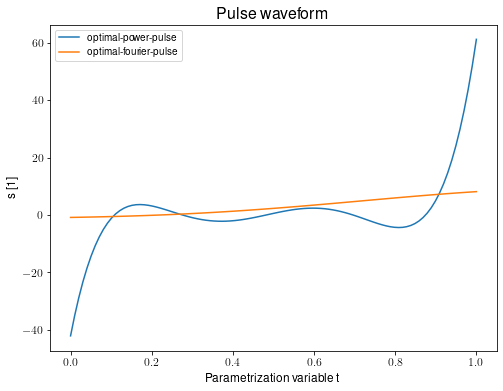

In [28]:
plot_pulses(pulse_lookup=lookup)

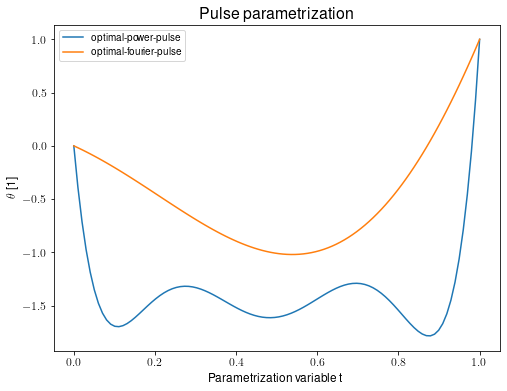

In [29]:
plot_parametrizations(pulse_lookup=lookup)